In [1]:
import math
import collections

import numpy as np
import pandas as pd
import pandas.plotting
import scipy.stats
import matplotlib.pyplot as pp
from shapely.geometry import Point, Polygon
import geopandas as gs
import descartes

%matplotlib inline

In [6]:
Bagger = pd.read_csv('PeakbaggerList(Unique-Single).csv')

In [7]:
Bagger

,AscentDate,PeakPointName,Location,Lat,Long,Elevation-Gain(ft),Elevation-Gain(m),Prominence(ft),Prominence(m),Vertical-Up(ft),...,SnowOnGround,Scramble,ExposedScramble,Crampons,Rope,Headlamp,Poles,TentCamp,Solo-Hike,OnlyPartyOnMountain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/27/18,Sandstone Peak,CA,34.120429,-118.931994,3111.0,948.0,2201.0,671.0,1006.0,...,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/17/18,Mugu Peak,CA,34.092600,-119.055101,1266.0,386.0,380.0,116.0,1243.0,...,False,False,False,False,False,False,False,False,True,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,07/04/23,Delano Peak,UT,38.369237,-112.371355,12169.0,3709.0,4689.0,1429.0,2202.0,...,True,False,False,False,False,False,True,False,True,True
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,08/20/23,Clayton Peak,UT,40.590721,-111.559992,10721.0,3268.0,681.0,208.0,2215.0,...,False,True,False,False,False,False,True,False,True,False
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Peaks = Bagger.dropna(axis=0)

(-120.0, -98.0, 29.9318426, 42.573667400000005)

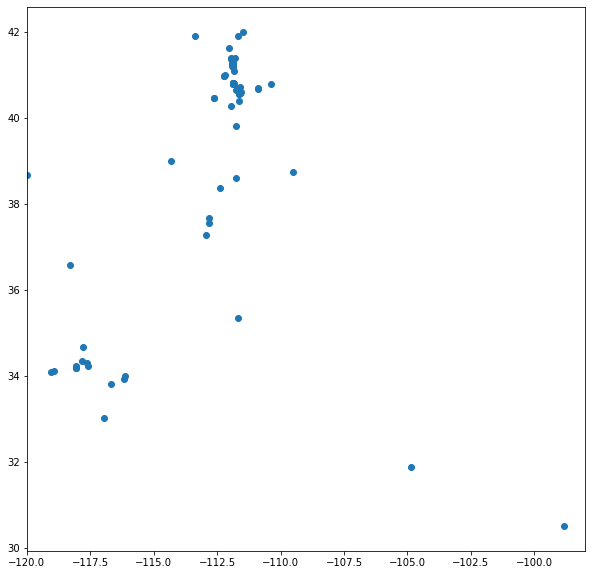

In [9]:
pp.figure(figsize=(10,10))
pp.scatter(x=Peaks['Long'], y=Peaks['Lat'])
           
pp.axis(xmin=-120,xmax=-98)

In [10]:
Country = gs.read_file('gadm41_USA_1.shp')

(-180.0, -60.0)

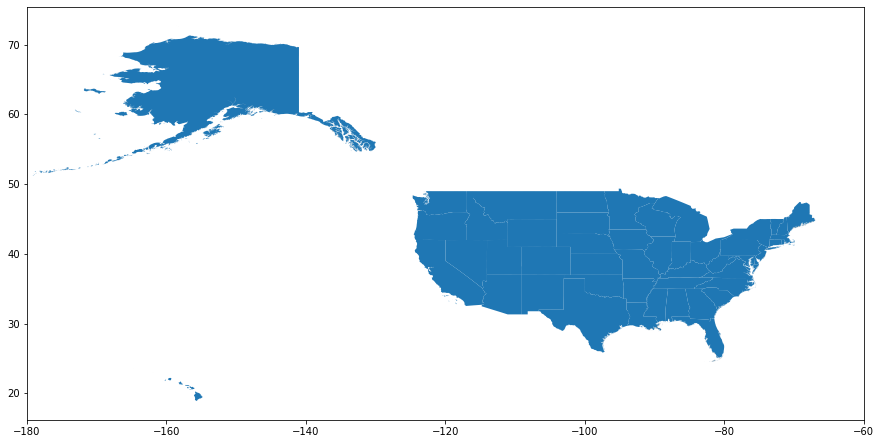

In [11]:
fig,ax = pp.subplots(figsize=(15,15))
Country.plot(ax = ax)
pp.xlim(-180,-60)

In [12]:
crs = {'init': 'epsg:4236'}
Peaks.head()

,AscentDate,PeakPointName,Location,Lat,Long,Elevation-Gain(ft),Elevation-Gain(m),Prominence(ft),Prominence(m),Vertical-Up(ft),...,SnowOnGround,Scramble,ExposedScramble,Crampons,Rope,Headlamp,Poles,TentCamp,Solo-Hike,OnlyPartyOnMountain
1,10/27/18,Sandstone Peak,CA,34.120429,-118.931994,3111.0,948.0,2201.0,671.0,1006.0,...,False,False,False,False,False,False,False,False,False,False
3,11/17/18,Mugu Peak,CA,34.092600,-119.055101,1266.0,386.0,380.0,116.0,1243.0,...,False,False,False,False,False,False,False,False,True,False
5,02/09/19,Jones Peak,CA,34.186585,-118.052947,3375.0,1029.0,55.0,17.0,2272.0,...,False,False,False,False,False,False,False,False,True,False
7,02/09/19,Hastings Peak,CA,34.194541,-118.062393,4000.0,1219.0,0.0,0.0,2897.0,...,False,False,False,False,False,False,False,False,True,False
9,03/16/19,Mount Islip,CA,34.345028,-117.839871,8250.0,2515.0,662.0,202.0,2594.0,...,True,False,False,True,False,False,True,False,False,False


In [13]:
geometry = [Point(xy) for xy in zip(Peaks['Long'], Peaks['Lat'])]
geometry[:3]

In [14]:
geo_Peaks = gs.GeoDataFrame(Peaks, crs=crs, geometry=geometry)
geo_Peaks.head()

,AscentDate,PeakPointName,Location,Lat,Long,Elevation-Gain(ft),Elevation-Gain(m),Prominence(ft),Prominence(m),Vertical-Up(ft),...,Scramble,ExposedScramble,Crampons,Rope,Headlamp,Poles,TentCamp,Solo-Hike,OnlyPartyOnMountain,geometry
1,10/27/18,Sandstone Peak,CA,34.120429,-118.931994,3111.0,948.0,2201.0,671.0,1006.0,...,False,False,False,False,False,False,False,False,False,POINT (-118.93199 34.12043)
3,11/17/18,Mugu Peak,CA,34.092600,-119.055101,1266.0,386.0,380.0,116.0,1243.0,...,False,False,False,False,False,False,False,True,False,POINT (-119.05510 34.09260)
5,02/09/19,Jones Peak,CA,34.186585,-118.052947,3375.0,1029.0,55.0,17.0,2272.0,...,False,False,False,False,False,False,False,True,False,POINT (-118.05295 34.18659)
7,02/09/19,Hastings Peak,CA,34.194541,-118.062393,4000.0,1219.0,0.0,0.0,2897.0,...,False,False,False,False,False,False,False,True,False,POINT (-118.06239 34.19454)
9,03/16/19,Mount Islip,CA,34.345028,-117.839871,8250.0,2515.0,662.0,202.0,2594.0,...,False,False,True,False,False,True,False,False,False,POINT (-117.83987 34.34503)


(35.0, 45.0)

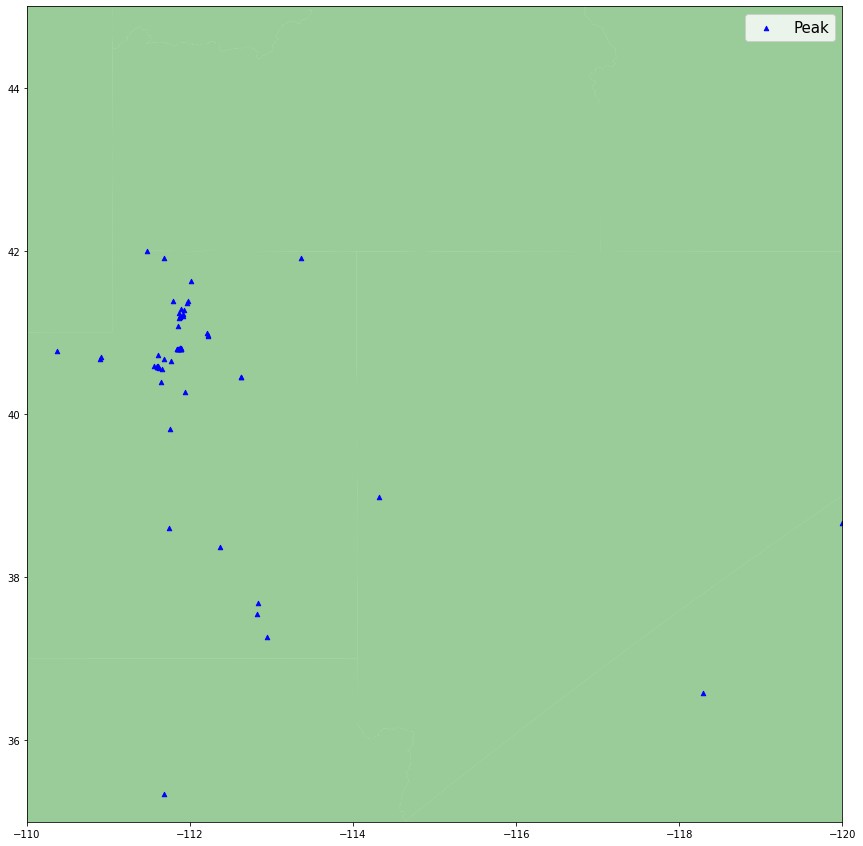

In [22]:
fig,ax = pp.subplots(figsize=(15,15))
Country.plot(ax = ax, alpha = 0.4, color="green")
geo_Peaks.geometry.plot(ax = ax, markersize = 20, color = "blue", marker = "^", label="Peak")
pp.legend(prop={'size': 15})
pp.xlim(-110,-120)
pp.ylim(35,45)